In [11]:
# settings 
# img_size is dimension to resize images to.
img_size = (175,175)
# number of pics in each class to use. use None for all
#pics_per_class = 300
pics_per_class = None
# set zipped datafile location​img_size
maxrgb_file = 'C:/Users/Nick/git-repos/plant-seedlings/maxrgb.zip'
alpha_file = 'C:/Users/Nick/git-repos//plant-seedlings/alpha.zip'

from ds_functions import *


In [12]:
data_maxrgb = images_to_df(maxrgb_file, 
                    img_size=img_size, 
                    pics_per_class=pics_per_class)

# Set features and target
features = ['px' + str(i) for i in range(1,1 + 3 * img_size[0] * img_size[1])] 

target = 'class'


Out Folder: ./maxrgb


In [15]:
# try plotting the data. See what color is the most common
colrange = {}
for i in range(1,4):
    colrange[i] = ['px' + str(j) for j in range(1 + (i-1), img_size[0] * img_size[1], 3)]
    
color_sums = pd.DataFrame({
    'id': data_maxrgb.loc[:, 'id']
})

for i in range(1,4):
    color_sums['color_sum' + str(i)] = data_maxrgb.loc[:, colrange[i]].sum(axis=1).reset_index(drop=True)
    # also add the average
    color_sums['color_mean' + str(i)] = data_maxrgb.loc[:, colrange[i]].mean(axis=1).reset_index(drop=True)
    
# I'll try joining the total color data to the pixel data and include the sum of each color as a feature
if not 'color_sum1' in list(data_maxrgb.columns):
    data_maxrgb = data_maxrgb.merge(color_sums, on='id')

features += ['color_sum'+str(i) for i in range(1,4)]
features += ['color_mean'+str(i) for i in range(1,4)]

data_maxrgb.head()

,class,id,px1,px2,px3,px4,px5,px6,px7,px8,...,px91872,px91873,px91874,px91875,color_sum1,color_mean1,color_sum2,color_mean2,color_sum3,color_mean3
0,Black-grass,0050f38b3,147,147,147,145,145,145,148,148,...,146,142,142,142,1482820,145.260580,1482820,145.260580,1482820,145.260580
1,Black-grass,0183fdf68,141,141,141,141,141,141,143,143,...,151,150,150,150,1446693,141.721493,1481304,145.112069,1448369,141.885678
2,Black-grass,0260cffa8,139,139,139,139,139,139,139,139,...,155,155,155,155,1409178,138.046434,1512611,148.178977,1403840,137.523511
3,Black-grass,05eedce4d,154,154,154,155,155,155,155,155,...,151,152,152,152,1433376,140.416928,1466624,143.673981,1436233,140.696806
4,Black-grass,075d004bc,169,169,169,168,168,168,0,166,...,142,142,142,142,1444106,141.468064,1506916,147.621082,1410987,138.223648


In [20]:
max_features = int(np.round(np.sqrt(len(features))))
rf = RandomForestClassifier(n_estimators=800, n_jobs=4, max_features=max_features)

rf_maxrgb = sk_cls(rf, data_maxrgb, X=features, y=target)
rf_maxrgb.run()

Score:
 0.608421052631579
Classification Report:
                            precision    recall  f1-score   support

              Black-grass       0.60      0.14      0.23        21
                 Charlock       0.66      0.69      0.68        36
                 Cleavers       0.67      0.57      0.62        28
         Common Chickweed       0.54      0.75      0.63        68
             Common wheat       1.00      0.14      0.24        22
                  Fat Hen       0.61      0.68      0.65        44
         Loose Silky-bent       0.60      0.94      0.73        65
                    Maize       0.00      0.00      0.00        19
        Scentless Mayweed       0.53      0.63      0.58        52
          Shepherds Purse       1.00      0.04      0.07        28
Small-flowered Cranesbill       0.62      0.91      0.74        47
               Sugar beet       0.85      0.51      0.64        45

              avg / total       0.64      0.61      0.56       475



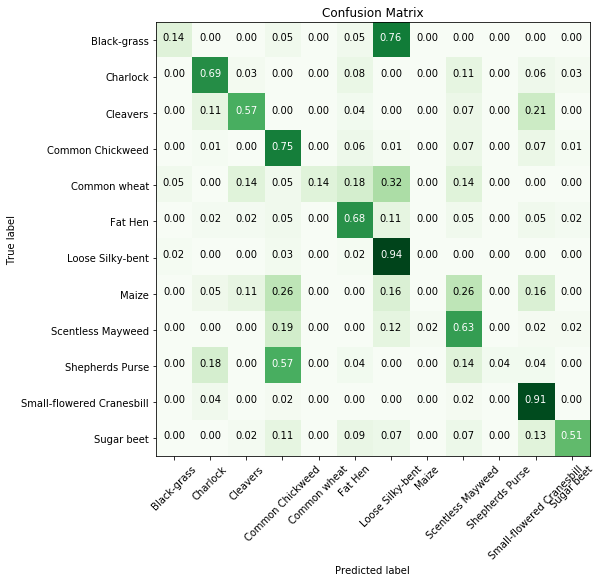

In [21]:
rf_maxrgb.show()

In [18]:
data_alpha = images_to_df(alpha_file, 
                    img_size=img_size, 
                    pics_per_class=pics_per_class)

# Set features and target
features = ['px' + str(i) for i in range(1,1 + 3 * img_size[0] * img_size[1])] 
target = 'class'

Out Folder: ./alpha


In [23]:
rf_alpha = sk_cls(RandomForestClassifier(n_estimators=600, 
                                         n_jobs=4), 
                  data=data_alpha, X=features, y=target)
rf_alpha.run()

Score:
 0.6336842105263157
Classification Report:
                            precision    recall  f1-score   support

              Black-grass       0.20      0.04      0.07        25
                 Charlock       0.66      0.80      0.73        41
                 Cleavers       0.68      0.55      0.61        31
         Common Chickweed       0.58      0.76      0.66        68
             Common wheat       0.29      0.12      0.17        17
                  Fat Hen       0.45      0.50      0.48        48
         Loose Silky-bent       0.65      0.88      0.75        77
                    Maize       0.80      0.33      0.47        24
        Scentless Mayweed       0.64      0.61      0.62        46
          Shepherds Purse       1.00      0.47      0.64        19
Small-flowered Cranesbill       0.75      0.95      0.84        40
               Sugar beet       0.75      0.54      0.63        39

              avg / total       0.62      0.63      0.61       475



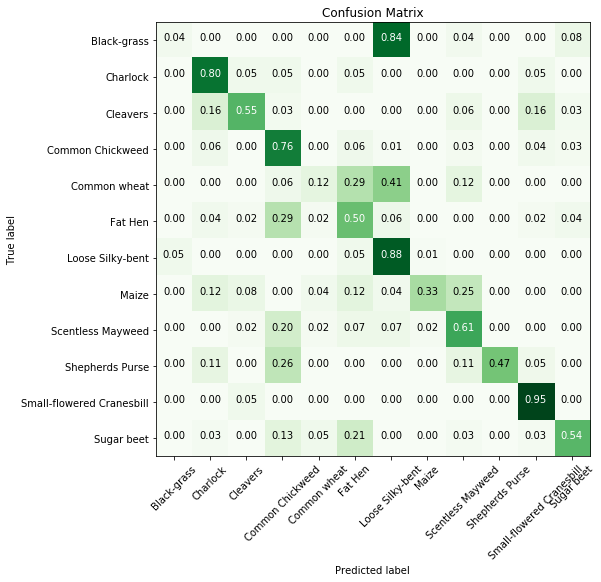

In [24]:
rf_alpha.show()

In [2]:
gr_yl_data = 'C:/Users/Nick/git-repos/plant-seedlings/green_yellow.zip'

data_gr_yl = images_to_df(gr_yl_data, 
                    img_size=img_size, 
                    pics_per_class=pics_per_class)

# Set features and target
features = ['px' + str(i) for i in range(1,1 + 3 * img_size[0] * img_size[1])] 
target = 'class'

Out Folder: ./green_yellow


In [84]:
X_tr, X_ts, y_tr, y_ts = train_test_split(data_gr_yl[features], data_gr_yl[target], test_size=0.08)
y_tr.name = 'class'

In [85]:
rf_cv = sk_cls(RandomForestClassifier(n_estimators=600, n_jobs=4),
                                         data=X_tr.join(y_tr), X=features, y=target, cv=10)
rf_cv.run()

                           precision    recall  f1-score   support

              Black-grass       0.57      0.07      0.13       218
                 Charlock       0.82      0.88      0.85       316
                 Cleavers       0.84      0.63      0.72       236
         Common Chickweed       0.69      0.94      0.80       511
             Common wheat       0.70      0.07      0.13       190
                  Fat Hen       0.75      0.76      0.76       392
         Loose Silky-bent       0.55      0.93      0.69       543
                    Maize       0.92      0.40      0.56       174
        Scentless Mayweed       0.56      0.73      0.63       438
          Shepherds Purse       0.92      0.06      0.12       191
Small-flowered Cranesbill       0.79      0.92      0.85       407
               Sugar beet       0.83      0.59      0.69       317

              avg / total       0.72      0.69      0.64      3933



Text(0.5,-0.315571,'Predicted label')

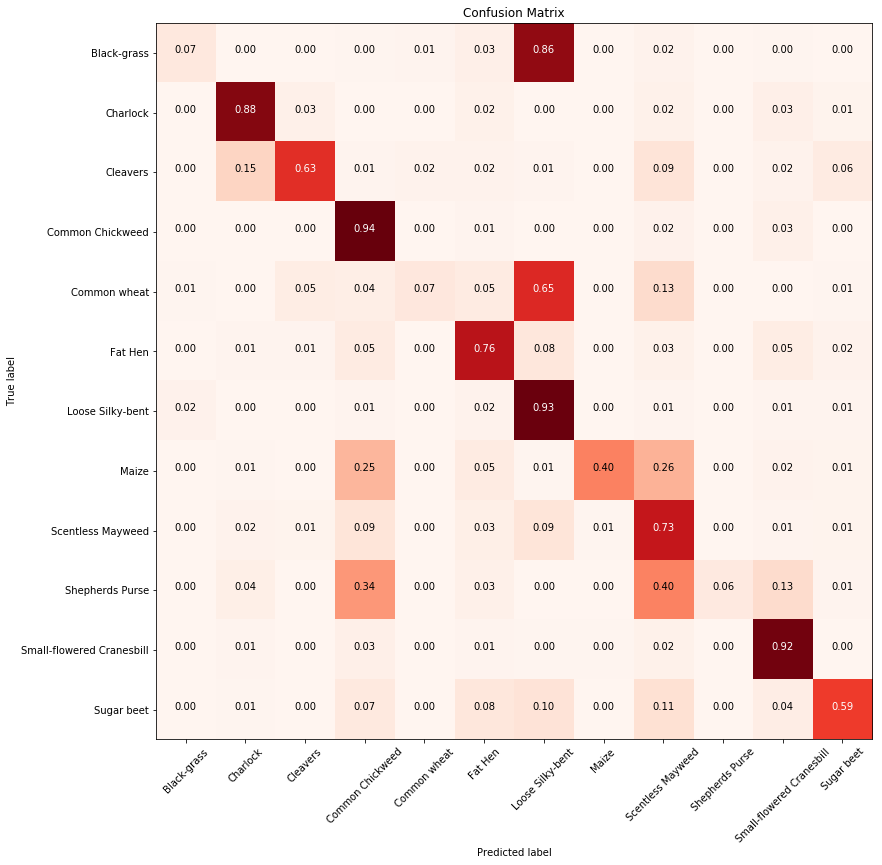

In [100]:
print(rf_col.cls_report)
cm_plot(rf_cv.conf_matrix, 
        classes=sorted(data_gr_yl[target].unique()), 
        figsize=(12,12), normalize=True, cbar=False, 
        cmap=plt.cm.Greens
        title='Confusion Matrix')
plt.show()

In [7]:
max_features = int(np.round(np.sqrt(len(features))) * 2)
rf_nocv = sk_cls(RandomForestClassifier(n_estimators=600, 
                                        max_features=max_features,
                                        n_jobs=4),
                 data=data_gr_yl, 
                 X=features, y=target, cv=None)
rf_nocv.run()

Score:
 0.7178947368421053
Classification Report:
                            precision    recall  f1-score   support

              Black-grass       0.50      0.03      0.06        31
                 Charlock       0.81      0.93      0.86        41
                 Cleavers       0.82      0.62      0.71        37
         Common Chickweed       0.73      0.96      0.83        55
             Common wheat       1.00      0.18      0.30        17
                  Fat Hen       0.71      0.74      0.73        47
         Loose Silky-bent       0.52      0.95      0.67        60
                    Maize       1.00      0.70      0.82        20
        Scentless Mayweed       0.76      0.79      0.78        57
          Shepherds Purse       1.00      0.16      0.27        19
Small-flowered Cranesbill       0.80      0.94      0.86        51
               Sugar beet       0.78      0.53      0.63        40

              avg / total       0.75      0.72      0.68       475



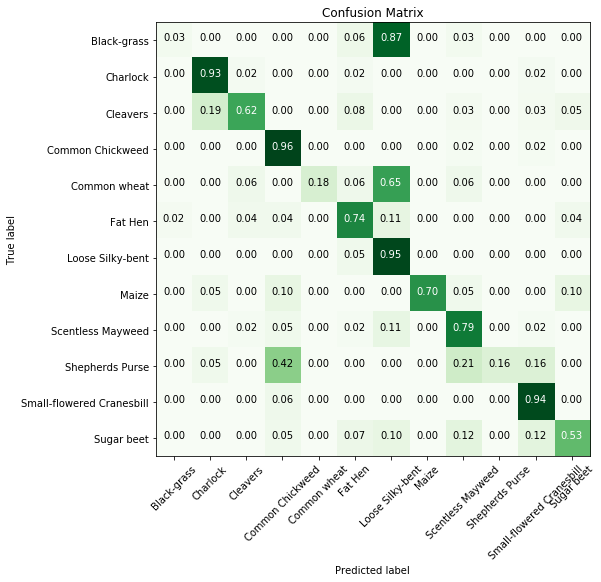

In [8]:
rf_nocv.show()

In [ ]:
# does the MLP classifier work at all on the green-yellow data?
features = ['px' + str(i) for i in range(1,1 + 3 * img_size[0] * img_size[1])] 
target = 'class'

mlp_model = sk_cls(MLPClassifier(),
                 data=data_gr_yl, 
                 X=features, y=target, cv=None)

mlp_model.run()
mlp_model.show()